# Machine Learning - UFRJ 2022.2
## Regressão Logística

#### Feito por Rafael da Silva Fernandes, DRE: 117196229

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from itertools import combinations

## Lendo e analisando dataset

In [2]:
df = pd.read_csv("data-t1.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dado que a coluna "diagnosis" é do tipo object, precisamos convertê-la para inteiro para sermos capazes de realizar a regressão linear. Na célula abaixo, trocamos todos os valores de "M" (Maligno) para 1, e todos os valores de "B" (Benigno) para 0 - na verdade, todos os valores diferentes de "M" serão iguais à 0, mas como há apenas "B" como diferente, podemos dizer que todos os que não são "M" serão iguais à 0.

> Referência: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

In [4]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [5]:
df["diagnosis"] = np.where(df["diagnosis"] == "M", 1, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Podemos observar pelos resultados acima que todas as colunas estão completamente preenchidas, com exceção da última ("Unnamed: 32") que está completamente vazia. Por essa razão, a removemos do dataset por meio da célula abaixo.

In [6]:
df.drop(columns = ["Unnamed: 32"], inplace = True)
df.shape

(569, 32)

Para garantir que todas as linhas do dataset são únicas, utilizamos a célula abaixo para remover qualquer duplicata existente. O dataset continua com suas 569 linhas e 32 colunas, portanto podemos afirmar que todas as linhas já eram únicas.

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(569, 32)

Por via das dúvidas, removemos todos os valores NaN ou Infinito que possam haver no dataset. Dado que ele continua com 569 linhas e 32 colunas, não havia tais valores.

> Referência: https://stackoverflow.com/questions/45745085/python-pandas-how-to-remove-nan-and-inf-values

In [8]:
df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.shape

(569, 32)

## Inicializando modelo de Regressão Linear Múltipla

> Referência: https://datatofish.com/multiple-linear-regression-python/

Apesar do primeiro passo para saber se aplicamos ou não regressão linear ser plotar as combinações de colunas, dado que temos 435 combinações esse passo foi pulado - fora o fato do exercício ser sobre regressão linear por si só.

In [9]:
column_combination = list(combinations(df.columns[2:].tolist(), 2))
len(column_combination)

435

In [10]:
# Todos os valores do dataset, excluindo as tabelas "id" e "diagnosis"
x = df.iloc[:, 2:]
x = sm.add_constant(x) 

# Variável dependente
y = df["diagnosis"]

linear_reg = sm.OLS(y, x).fit()
summary = linear_reg.summary()
summary

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          6.05e-153
Time:                        21:35:36   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.0218      0.428     -4.724      0.000      -2.863      -1.181
radius_mean                -0.2178      0.174     -1.255      0.210      -0.559       0.123
texture_mean                0.0045      0.008      0.572      0.567      -0.011       0.020
perimeter_mean              0.0237      0.025      0.946      0.345      -0.026       0.073
area_mean                   0.0003      0.001      0.605      0.545      -0.001       0.001
smoothness_mean             0.0847      2.017      0.042      0.967      -3.878       4.047
compactness_mean           -4.2220      1.334     -3.166      0.002      -6.842      -1.602
concavity_mean              1.3980      1.046      1.337      0.182      -0.656       3.452
concave points_mean         2.1418      1.979      1.082      0.280      -1.746       6.030
symmetry_mean               0.1027      0.743      0.138      0.890      -1.356       1.562
fractal_dimension_mean      0.0333      5.572      0.006      0.995     -10.913      10.979
radius_se                   0.4350      0.310      1.401      0.162      -0.175       1.045
texture_se                 -0.0068      0.037     -0.183      0.855      -0.079       0.066
perimeter_se               -0.0225      0.041     -0.548      0.584      -0.103       0.058
area_se                    -0.0009      0.001     -0.660      0.509      -0.004       0.002
smoothness_se              15.8543      6.625      2.393      0.017       2.841      28.868
compactness_se              0.0649      2.169      0.030      0.976      -4.197       4.327
concavity_se               -3.5655      1.301     -2.741      0.006      -6.121      -1.010
concave points_se          10.5680      5.452      1.938      0.053      -0.142      21.278
symmetry_se                 1.6973      2.728      0.622      0.534      -3.661       7.055
fractal_dimension_se       -7.1464     11.676     -0.612      0.541     -30.083      15.791
radius_worst                0.1952      0.058      3.367      0.001       0.081       0.309
texture_worst               0.0072      0.007      1.030      0.303      -0.006       0.021
perimeter_worst            -0.0024      0.006     -0.410      0.682      -0.014       0.009
area_worst                 -0.0010      0.000     -3.163      0.002      -0.002      -0.000
smoothness_worst            0.5429      1.435      0.378      0.705      -2.275       3.361
compactness_worst           0.0672      0.383      0.175      0.861      -0.685       0.820
concavity_worst             0.3812      0.269      1.419      0.156      -0.146       0.909
concave points_worst        0.4643      0.914      0.508      0.612      -1.332       2.260
symmetry_worst              0.5568      0.494      1.126      0.260      -0.414       1.528
fractal_dimension_worst     4.3035      2.383  

Com o intuito de facilitar a visualização e retirada de informações, colocamos os dados retornados acima em um DataFrame.

> Referência: https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe

In [11]:
summary_as_html = summary.tables[1].as_html()
df_summary = pd.read_html(summary_as_html, header = 0, index_col = 0)[0]
df_summary = df_summary.iloc[1: , :]
df_summary

,coef,std err,t,P>|t|,[0.025,0.975]
radius_mean,-0.2178,0.174,-1.255,0.210,-0.559,0.123
texture_mean,0.0045,0.008,0.572,0.567,-0.011,0.020
perimeter_mean,0.0237,0.025,0.946,0.345,-0.026,0.073
area_mean,0.0003,0.001,0.605,0.545,-0.001,0.001
smoothness_mean,0.0847,2.017,0.042,0.967,-3.878,4.047
compactness_mean,-4.2220,1.334,-3.166,0.002,-6.842,-1.602
concavity_mean,1.3980,1.046,1.337,0.182,-0.656,3.452
concave points_mean,2.1418,1.979,1.082,0.280,-1.746,6.030
symmetry_mean,0.1027,0.743,0.138,0.890,-1.356,1.562
fractal_dimension_mean,0.0333,5.572,0.006,0.995,-10.913,10.979


Para descobrir quais as variáveis que influenciam no valor da coluna "diagnosis" em Maligno ou Benigno, comparamos os valores da coluna P>|t| com um alpha de nossa escolha. Utilizamos o valor padrão, que é igual à 0.05.

In [12]:
important_columns = df_summary.loc[df_summary["P>|t|"] < 0.05].index.tolist()
important_columns

['compactness_mean',
 'smoothness_se',
 'concavity_se',
 'radius_worst',
 'area_worst']

Abaixo calculamos a variância para cada uma das colunas consideradas importantes pelo nosso modelo. 

In [13]:
df.var()[important_columns]

compactness_mean         0.002789
smoothness_se            0.000009
concavity_se             0.000911
radius_worst            23.360224
area_worst          324167.385102
dtype: float64

In [14]:
important_columns.remove("smoothness_se")
important_columns

['compactness_mean', 'concavity_se', 'radius_worst', 'area_worst']

## Visualizando resultados

Inicializamos plotando a matriz de correlação do Matplotlib.

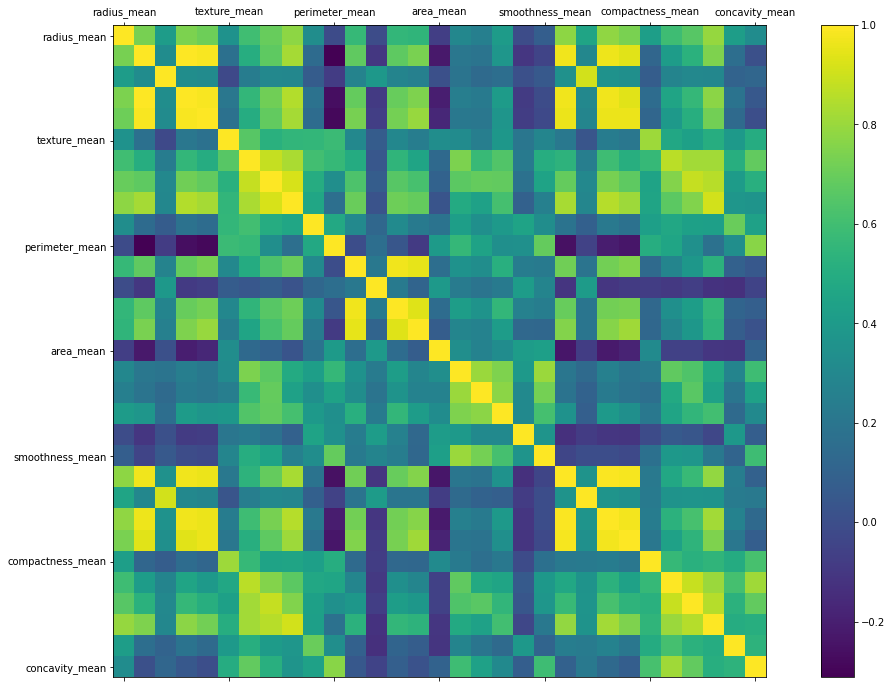

In [15]:
figure = plt.figure(figsize = (20, 12))
axes = figure.add_subplot(111)

caxes = axes.matshow(df.iloc[:, 1:].corr())
figure.colorbar(caxes)

axes.set_xticklabels([''] + df.columns[1:])
axes.set_yticklabels([''] + df.columns[1:])

plt.show()

Para uma melhor visualização, plotamos a matriz de correlação do Pandas.

In [16]:
correlation = df.iloc[:, 1:].corr()
correlation.style.background_gradient(cmap = "coolwarm")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Por fim, fazemos uma combinação 2 a 2 de todas as colunas importantes e plotamos a regressão linear entre elas, diferenciando a cor para os valores da coluna diagnosis.

In [17]:
important_column_combination = list(combinations(important_columns, 2))
important_column_combination

[('compactness_mean', 'concavity_se'),
 ('compactness_mean', 'radius_worst'),
 ('compactness_mean', 'area_worst'),
 ('concavity_se', 'radius_worst'),
 ('concavity_se', 'area_worst'),
 ('radius_worst', 'area_worst')]

Abaixo segue os plots da regressão linear para cada um dos diagnósticos.

<Figure size 1080x576 with 0 Axes>

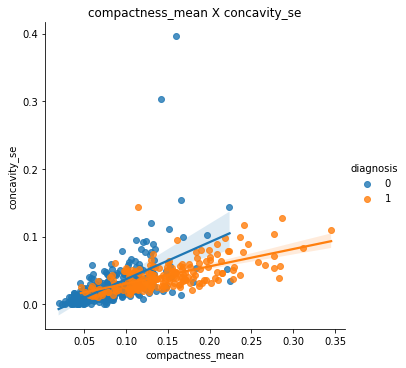

<Figure size 1080x576 with 0 Axes>

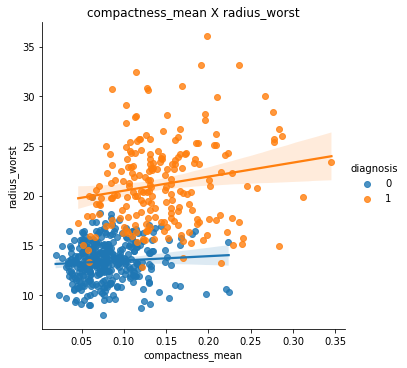

<Figure size 1080x576 with 0 Axes>

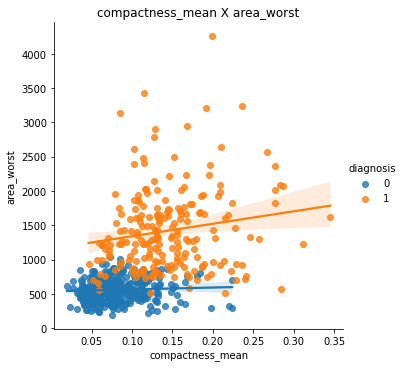

<Figure size 1080x576 with 0 Axes>

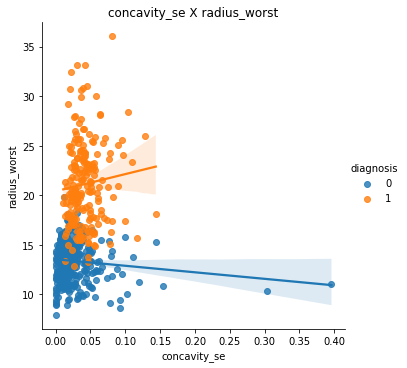

<Figure size 1080x576 with 0 Axes>

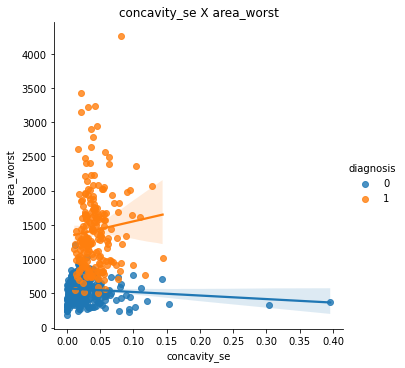

<Figure size 1080x576 with 0 Axes>

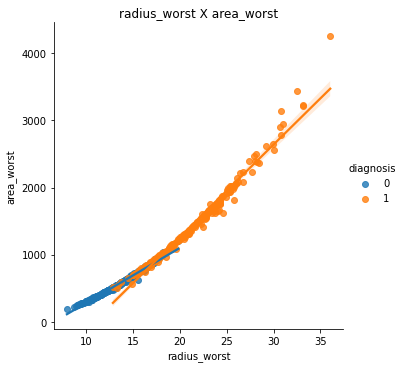

In [18]:
for combination in important_column_combination:

    x_axis = combination[0]
    y_axis = combination[1]

    plt.figure(figsize = (15, 8))

    sns.lmplot(x = x_axis, y = y_axis, hue = "diagnosis", data = df)

    plt.title(f"{x_axis} X {y_axis}")
    plt.show()

Abaixo segue o plot da regressão linear para ambos os diagnósticos juntos.

<Figure size 1080x576 with 0 Axes>

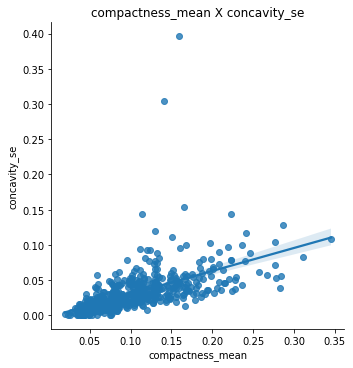

<Figure size 1080x576 with 0 Axes>

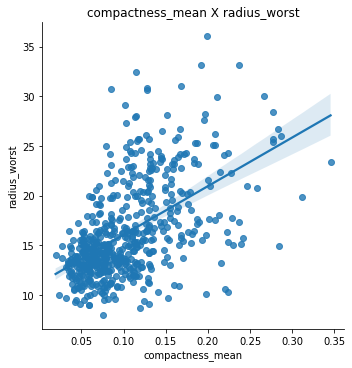

<Figure size 1080x576 with 0 Axes>

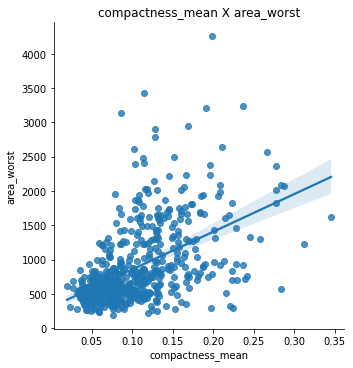

<Figure size 1080x576 with 0 Axes>

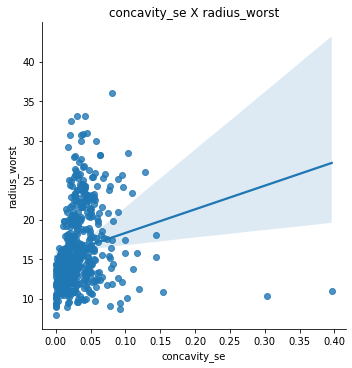

<Figure size 1080x576 with 0 Axes>

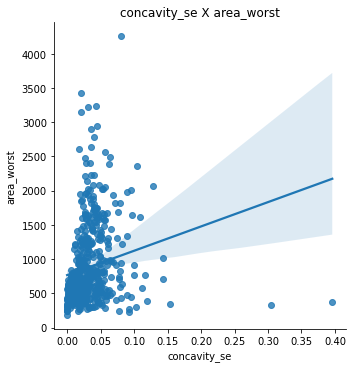

<Figure size 1080x576 with 0 Axes>

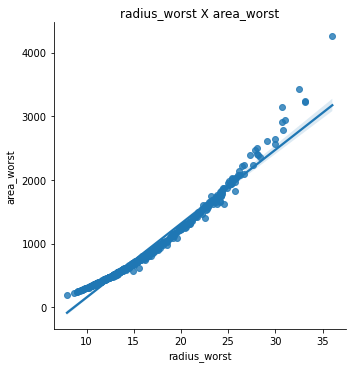

In [19]:
for combination in important_column_combination:

    x_axis = combination[0]
    y_axis = combination[1]

    plt.figure(figsize = (15, 8))

    sns.lmplot(x = x_axis, y = y_axis, data = df)

    plt.title(f"{x_axis} X {y_axis}")
    plt.show()

## Inicializando modelo de Regressão Logística

> Referência: https://realpython.com/logistic-regression-python/

In [20]:
logistic_reg = LogisticRegression(solver = "liblinear", random_state = 260922)
logistic_reg.fit(x, y)
logistic_reg.classes_

array([0, 1])

In [21]:
print(f"Coef = {logistic_reg.coef_} \n\nIntercept = {logistic_reg.intercept_}")

Coef = [[-3.84194807e-01 -2.08781407e+00 -1.17694228e-01  1.05384120e-01
  -5.54098438e-04  1.31075658e-01  3.97499905e-01  6.09193456e-01
   3.02355403e-01  1.90025243e-01  2.60984287e-02 -1.09263625e-02
  -1.19499183e+00 -1.49603780e-01  1.04649473e-01  1.38003326e-02
   2.36354877e-02  6.99788253e-02  3.64691633e-02  3.79810684e-02
  -1.52434171e-03 -1.54184595e+00  3.43790480e-01  1.36877750e-01
   2.64843945e-02  2.41278103e-01  1.15286161e+00  1.54361765e+00
   5.81632696e-01  5.86043934e-01  1.15301054e-01]] 

Intercept = [-0.38419481]


In [22]:
logistic_reg.predict(x)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Como as informações acima não são muito claras do quão bom é o nosso modelo, calculamos abaixo o score dele.

In [23]:
logistic_reg.score(x, y)

0.9578207381370826

Para facilitar a visualização, mostramos abaixo a matriz de confusão.

In [24]:
confusion_matrix(y, logistic_reg.predict(x))

array([[348,   9],
       [ 15, 197]])

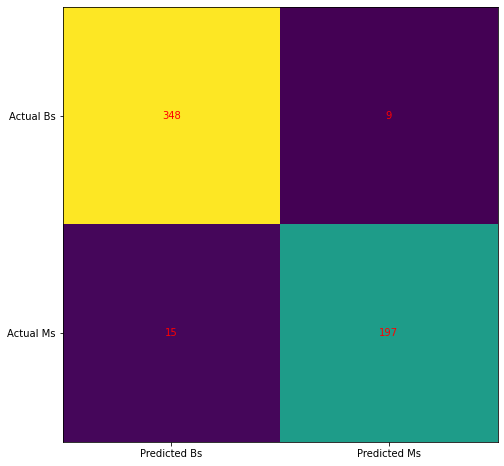

In [25]:
cm = confusion_matrix(y, logistic_reg.predict(x))

fig, ax = plt.subplots(figsize = (8, 8))

ax.imshow(cm)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels = ("Predicted Bs", "Predicted Ms"))
ax.yaxis.set(ticks = (0, 1), ticklabels = ("Actual Bs", "Actual Ms"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va = "center", color = "red")

plt.show()

Para uma visão geral do quão bom é o nosso modelo, imprimos abaixo o relatório formado pelo scikit-learn.

In [26]:
print(classification_report(y, logistic_reg.predict(x)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       357
           1       0.96      0.93      0.94       212

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



Vemos então uma visão da regressão logística para as combinações das 4 colunas importantes.

> Referência: https://ajaytech.co/python-logistic-regression/

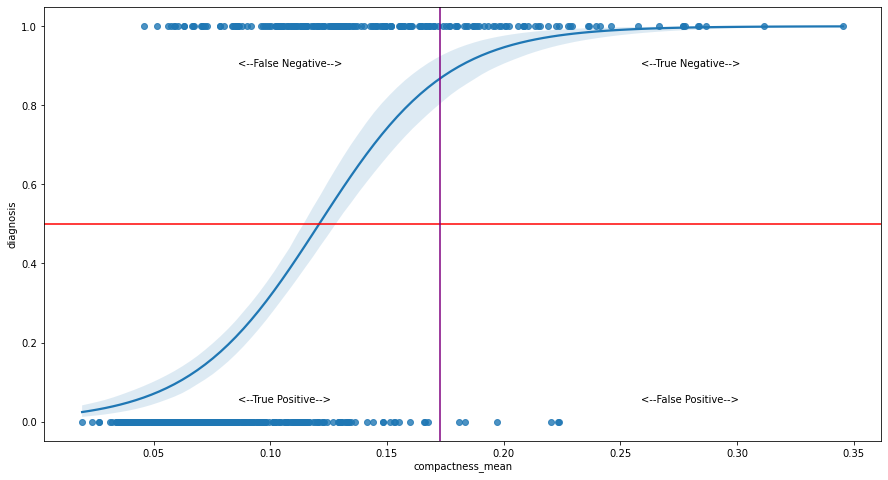

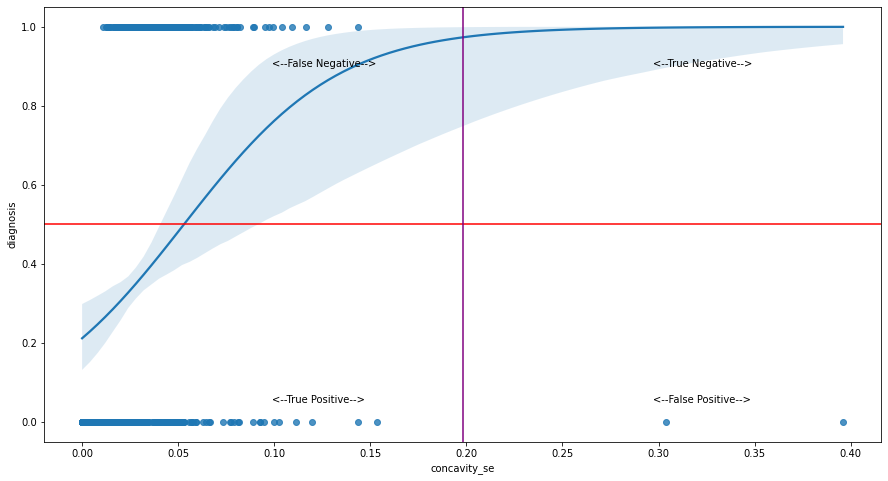

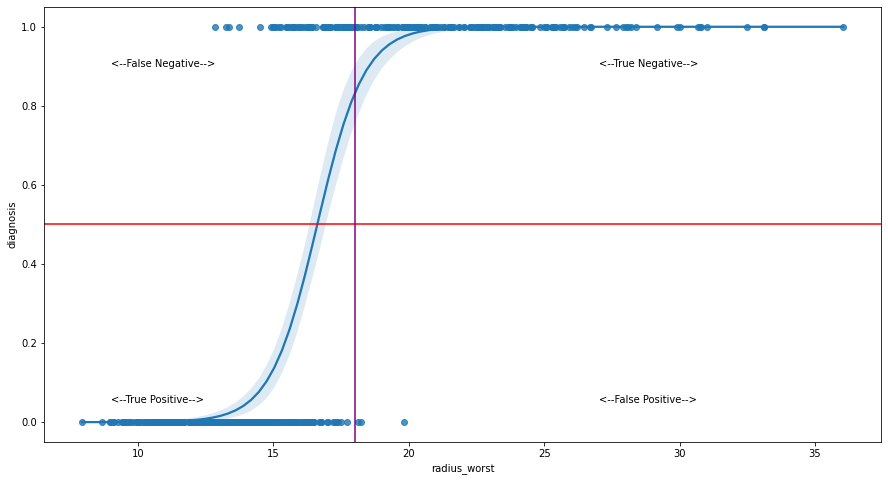

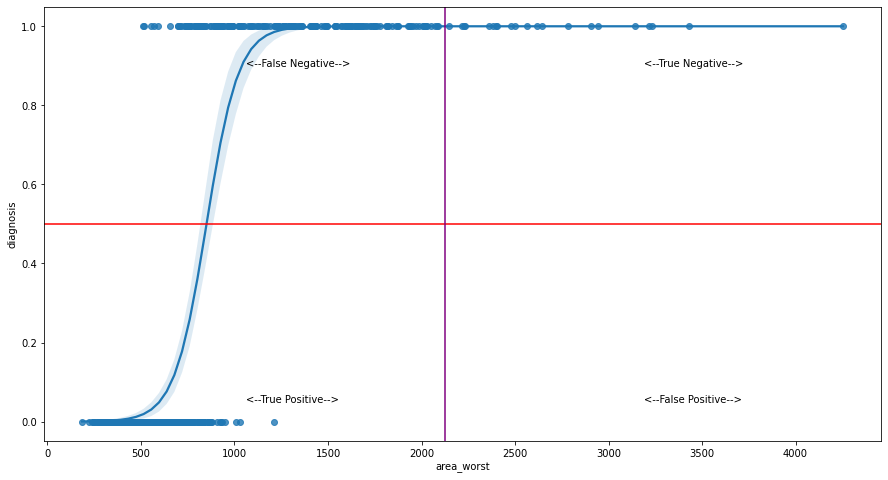

In [27]:
for column in important_columns:

    plt.figure(figsize = (15, 8))

    sns.regplot(x = column, y = df["diagnosis"], data = df, logistic = True)
    
    plt.axhline(.5, color = "red")
    plt.axvline(max(df[column])/ 2, color = "purple")

    plt.text(max(df[column])/ 4, 0.9, "<--False Negative-->")
    plt.text(3 * max(df[column])/ 4, 0.9, "<--True Negative-->")
    plt.text(max(df[column])/ 4, 0.05, "<--True Positive-->")
    plt.text(3 * max(df[column])/ 4, 0.05, "<--False Positive-->")

    plt.show()